In [1]:
import pandas as pd
import numpy as np

import scipy.stats as sc
import statsmodels.api as sm

# 1) Delivery_time -> Predict delivery time using sorting time



In [2]:
df = pd.read_csv("delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.shape

(21, 2)

# The Simple Linear Regression is :
Delivery Time= m*Sorting Time + c

where m is slope and c is intercept/constant

In [5]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

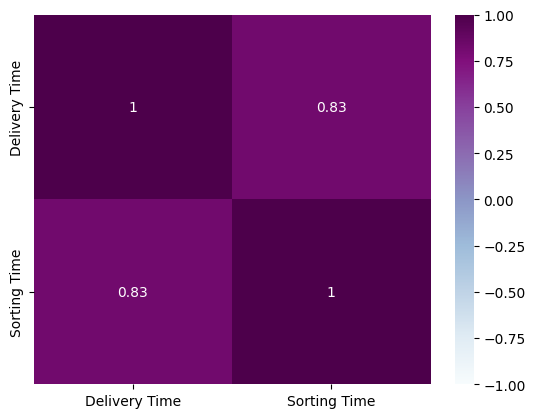

In [7]:
sns.heatmap(df.corr(),annot = True, vmin = -1, vmax = 1, cmap = 'BuPu')

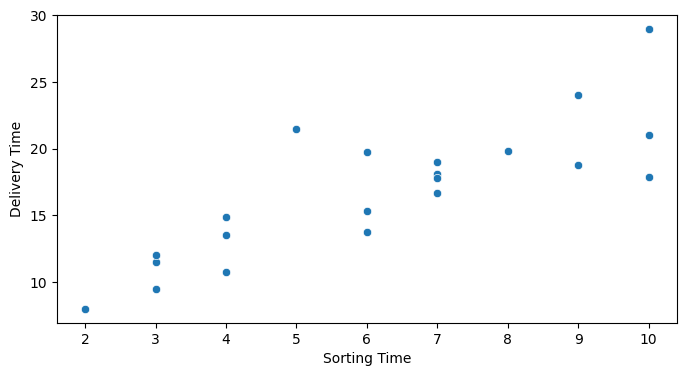

In [8]:
plt.figure(figsize=(8,4))
sns.scatterplot(x =df['Sorting Time'], y = df['Delivery Time'])
plt.show()

#There is some sort of relation between delivery time and sorting time

<Axes: xlabel='Sorting Time', ylabel='Density'>

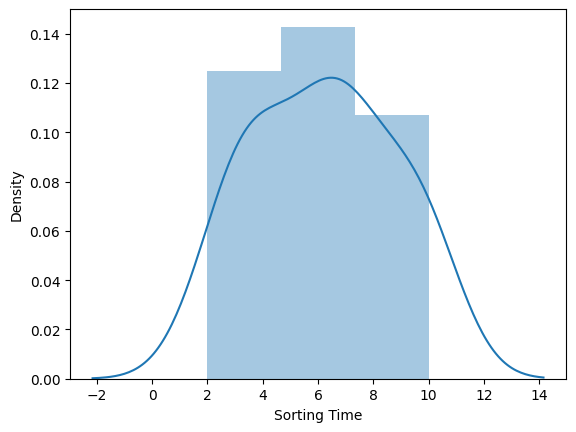

In [9]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(df['Sorting Time'])

<Axes: xlabel='Delivery Time', ylabel='Density'>

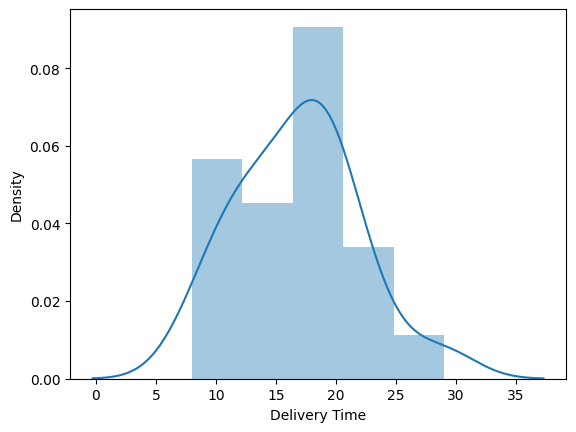

In [10]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot( df['Delivery Time'])

In [11]:
X = df['Sorting Time']

In [12]:
Y = df['Delivery Time'] #dependent

In [13]:
X = sm.add_constant(X)
X

,const,Sorting Time
0,1.0,10
1,1.0,4
2,1.0,6
3,1.0,9
4,1.0,10
5,1.0,6
6,1.0,7
7,1.0,3
8,1.0,10
9,1.0,9


Now using statsmodel libraries we going to build the linear regression model and check the various statistical parameters

In [14]:
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        11:46:39   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.5827      1.722      3.823      0.001       2.979      10.186
Sorting Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.params

const           6.582734
Sorting Time    1.649020
dtype: float64

# The Simple Linear regression is :
    
 Delivery Time = 6.5827+1.6490*Sorting Time

In [16]:
print('The variation of the dependent variable explained by the independent variable is', model.rsquared*100,'%')

The variation of the dependent variable explained by the independent variable is 68.2271474841723 %


In [17]:
model.resid #Error

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

Now let us predict the value by model we have built

In [18]:
Ypred = model.predict(X)
Ypred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [19]:
df['Prediction'] = Ypred
df.head()

,Delivery Time,Sorting Time,Prediction
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933


In [20]:
Error = df['Delivery Time']-df['Prediction']
Error

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

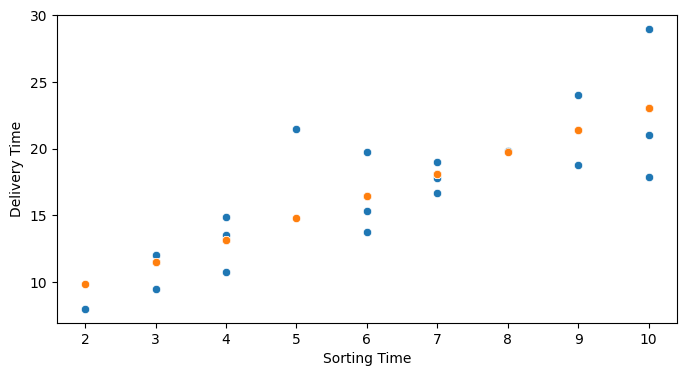

In [21]:
plt.figure(figsize=(8,4))
sns.scatterplot(x =df['Sorting Time'], y = df['Delivery Time'] )
sns.scatterplot(x =df['Sorting Time'], y = df['Prediction'] )
plt.show()

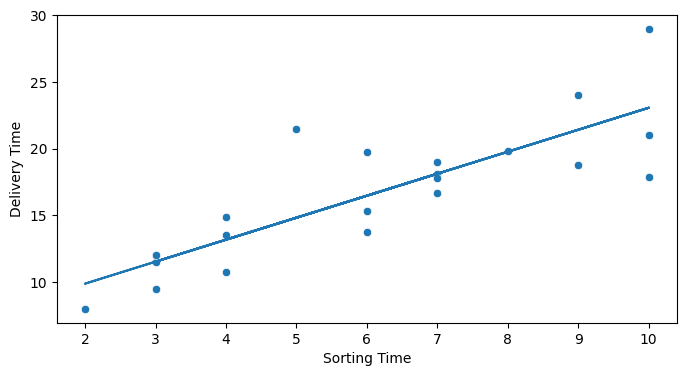

In [22]:
plt.figure(figsize=(8,4))
sns.scatterplot(x =df['Sorting Time'], y = df['Delivery Time'] )
plt.plot(df['Sorting Time'], df['Prediction'] )
plt.show()

In [23]:
rmse_lin = np.sqrt(np.mean((np.array(df['Delivery Time'])-np.array(df['Prediction']))**2))
rmse_lin

2.7916503270617654

# Log transformation

In [24]:
X2 = df['Sorting Time']

In [25]:
import statsmodels.formula.api as smf
model2 = smf.ols('Y~np.log(X2)',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           2.64e-06
Time:                        11:46:40   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(X2)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
pred2 = model2.predict(pd.DataFrame(df['Sorting Time']))
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [27]:
rmse_log = np.sqrt(np.mean((np.array(Y)-np.array(pred2))**2))
rmse_log

2.733171476682066

In [28]:
pred2.corr(Y)

0.8339325279256242

In [29]:
model2.params

Intercept     1.159684
np.log(X2)    9.043413
dtype: float64

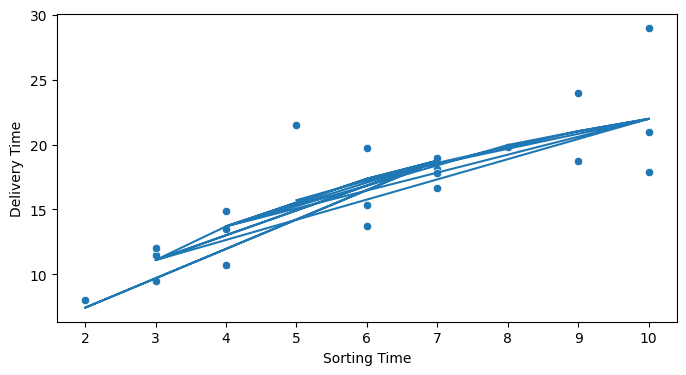

In [30]:
plt.figure(figsize=(8,4))
sns.scatterplot(x =df['Sorting Time'], y = df['Delivery Time'] )
plt.plot(df['Sorting Time'], pred2 )
plt.show()

In [31]:
X2

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64

In [32]:
#exponential model
model3 = smf.ols('np.log(Y)~X2',data=df).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(Y)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           1.59e-06
Time:                        11:46:40   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
X2             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
pred_log = model3.predict(pd.DataFrame(df['Sorting Time']))
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [34]:
pred3=np.exp(pred_log)  # as we have used log(Deliveriy Time) in preparing model so we need to convert it back
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [35]:
rmse_exp= np.sqrt(np.mean((np.array(Y)-np.array(pred3))**2))
rmse_exp

2.9402503230562007

In [36]:
pred3.corr(Y)

0.8085780108289259

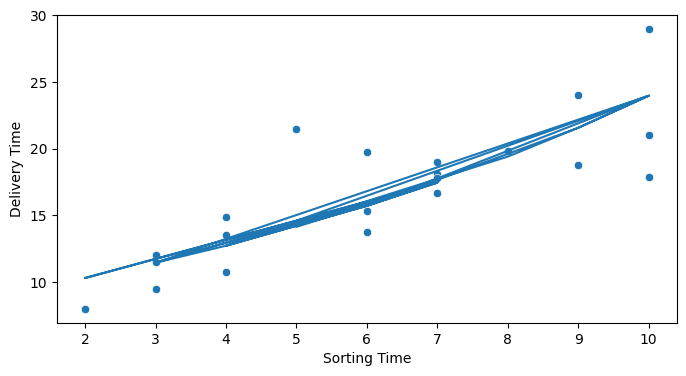

In [37]:
plt.figure(figsize=(8,4))
sns.scatterplot(x =df['Sorting Time'], y = df['Delivery Time'] )
plt.plot(df['Sorting Time'], pred3 )
plt.show()

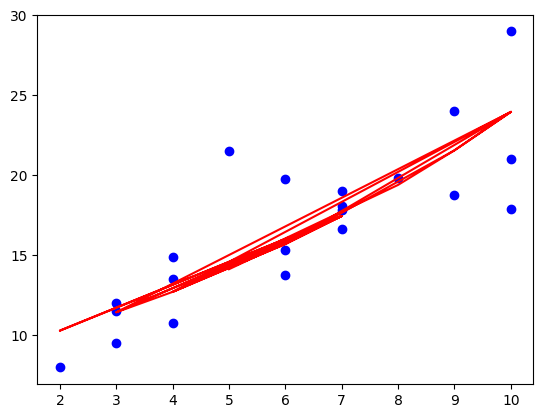

In [38]:
plt.plot(df['Sorting Time'],df['Delivery Time'],'bo')
plt.plot(X2,pred3,color='red')

Text(0, 0.5, 'Actual')

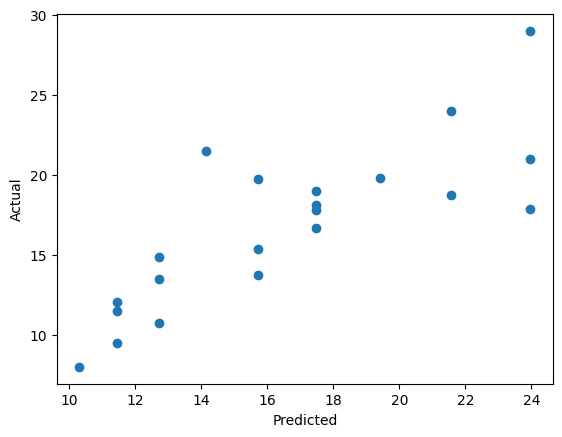

In [39]:
plt.scatter(x=pred3,y=Y)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [40]:
df["X2_sq"] = X2*X2
df

,Delivery Time,Sorting Time,Prediction,X2_sq
0,21.00,10,23.072933,100
1,13.50,4,13.178814,16
2,19.75,6,16.476853,36
3,24.00,9,21.423913,81
4,29.00,10,23.072933,100
5,15.35,6,16.476853,36
6,19.00,7,18.125873,49
7,9.50,3,11.529794,9
8,17.90,10,23.072933,100
9,18.75,9,21.423913,81


In [41]:
model_quad = smf.ols("np.log(Y)~X2+X2_sq",data=df).fit()
#model_quad.params

In [42]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(Y)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           2.20e-06
Time:                        11:46:42   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
X2             0.2659      0.080      3.315      0.004       0.097       0.434
X2_sq         -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
pred_quad = model_quad.predict(df)
pred4=np.exp(pred_quad)  # as we have used log(Delivery time) in preparing model so we need to convert it back
pred4


0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [44]:
rmse_quad = np.sqrt(np.mean((np.array(Y)-np.array(pred4))**2))
rmse_quad

2.799041988740932

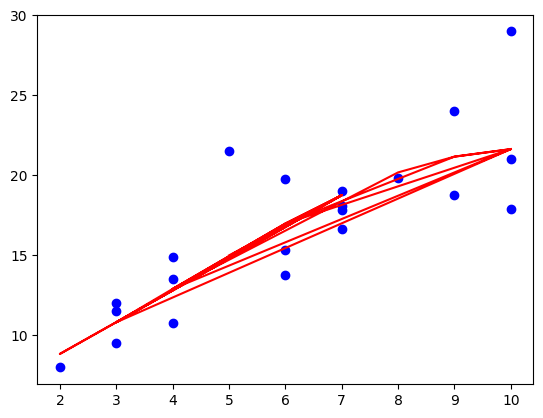

In [45]:
plt.scatter(X2,Y,c="b")
plt.plot(X2,pred4,"r")

# RMSE values and Rsquare

In [46]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse_quad,2.799042,0.764867


# 2) Salary_hike -> Build a prediction model for Salary_hike

In [47]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [49]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

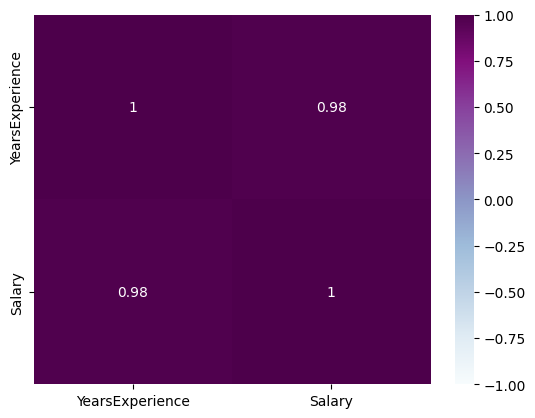

In [50]:
sns.heatmap(data.corr(),annot = True, vmin = -1, vmax = 1, cmap = 'BuPu')

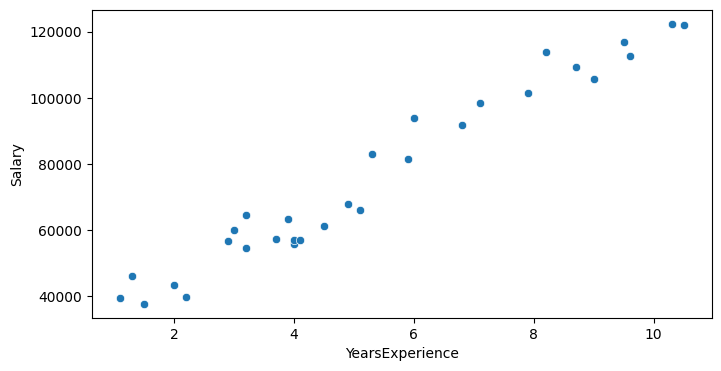

In [51]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = data['YearsExperience'], y = data['Salary'])
plt.show()

There is positive correlation,
Lets build model by seprating independent and dependent variable

In [52]:
x = data['YearsExperience']#independeny

In [53]:
y = data['Salary']#dependent

In [54]:
x =sm.add_constant(x)
x

,const,YearsExperience
0,1.0,1.1
1,1.0,1.3
2,1.0,1.5
3,1.0,2.0
4,1.0,2.2
5,1.0,2.9
6,1.0,3.0
7,1.0,3.2
8,1.0,3.2
9,1.0,3.7


In [55]:
model_s = sm.OLS(y,x).fit()
model_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        11:46:43   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The Simple Linear regression is :
Salary = 2.579e+04+9449.9623*YearsExperience

In [56]:
print('The variation of dependent variable explained by independent variable is',model_s.rsquared*100,'%')

The variation of dependent variable explained by independent variable is 95.69566641435085 %


In [57]:
ypred = model_s.predict(x)
ypred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [58]:
data['prediction'] = ypred
data.head()

,YearsExperience,Salary,prediction
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


In [59]:
error = data['Salary']-data['prediction']
error

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

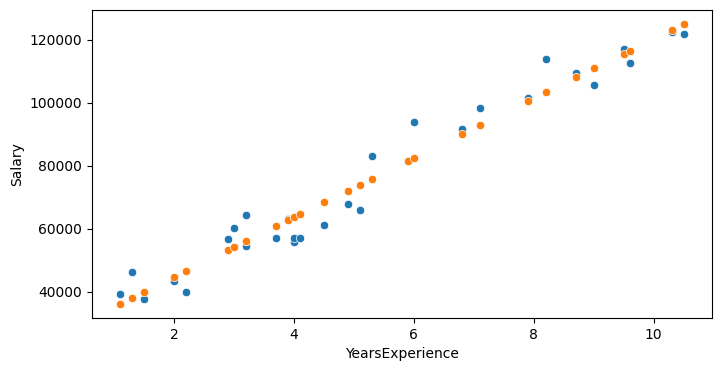

In [60]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = data['YearsExperience'], y = data['Salary'])
sns.scatterplot(x = data['YearsExperience'], y = data['prediction'])
plt.show()


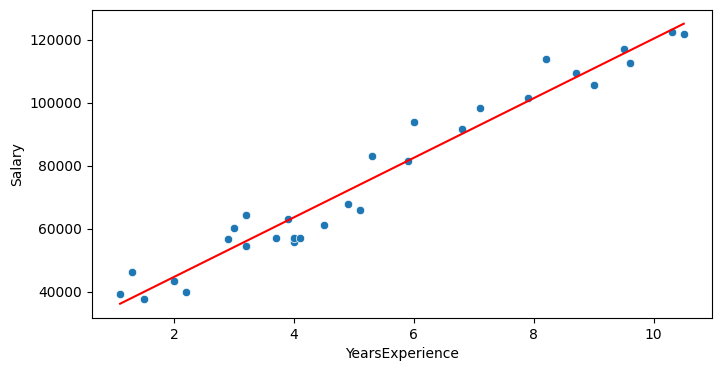

In [61]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = data['YearsExperience'], y = data['Salary'])
plt.plot( data['YearsExperience'],  data['prediction'],color='red')
plt.show()

In [62]:
model_s.params

const              25792.200199
YearsExperience     9449.962321
dtype: float64

In [63]:
rmse_s_lin = np.sqrt((np.mean(np.array(data['Salary'])-np.array(data['prediction']))**2))
rmse_s_lin

9.701276818911234e-13

# Log Transformation

In [64]:
x2 = np.log(data['YearsExperience'])

In [65]:
#model2
model_s2 = smf.ols("y~x2",data = data).fit()
model_s2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           3.25e-13
Time:                        11:46:43   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
x2          4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
model_s2.params

Intercept    14927.97177
x2           40581.98796
dtype: float64

In [67]:
pred_s = model_s2.predict(pd.DataFrame(data['YearsExperience']))
pred_s

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

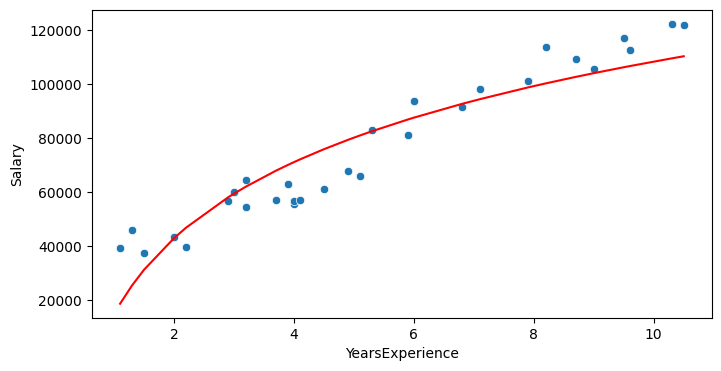

In [68]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=data['YearsExperience'], y=data['Salary'],data=data)
plt.plot(data['YearsExperience'],pred_s,'red')
plt.show()

In [69]:
rmse_slog = np.sqrt((np.mean(np.array(data['Salary'])-np.array(pred_s))**2))
rmse_slog

1.3339255626002947e-11

In [70]:
pred_s.corr(y)

0.924061081788264

In [71]:
#model3 log(dep var)
y3 = np.log(data['Salary'])

In [72]:
x3=data['YearsExperience']

In [73]:
model_s3 = smf.ols("y3~x3",data = data).fit()
model_s3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           7.03e-18
Time:                        11:46:44   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
x3             0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
model_s3.params

Intercept    10.507402
x3            0.125453
dtype: float64

In [75]:
pred_slog = model_s3.predict(pd.DataFrame(x3))
pred_slog

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [76]:
pred_s3 = np.exp(pred_slog)
pred_s3

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [77]:
rmse_sexp = np.sqrt((np.mean(np.array(data['Salary'])-np.array(pred_s3))**2))
rmse_sexp

110.31210005323518

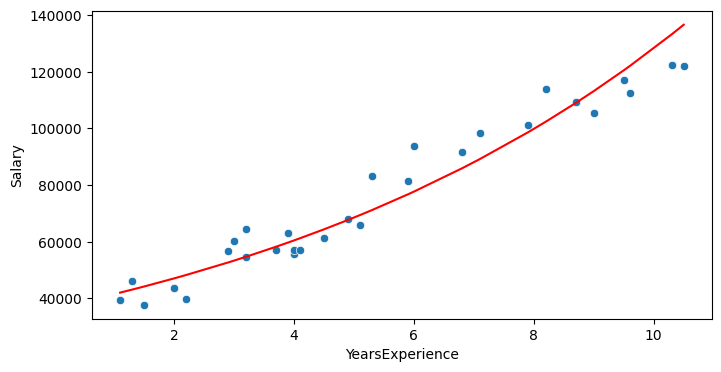

In [78]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=data['YearsExperience'], y=data['Salary'],data=data)
plt.plot(data['YearsExperience'],pred_s3,'red')
plt.show()

In [79]:
data["x3_sq"] = x3*x3
data.head()

,YearsExperience,Salary,prediction,x3_sq
0,1.1,39343.0,36187.158752,1.21
1,1.3,46205.0,38077.151217,1.69
2,1.5,37731.0,39967.143681,2.25
3,2.0,43525.0,44692.124842,4.00
4,2.2,39891.0,46582.117306,4.84


In [80]:
#model4 quad
model_s4 = smf.ols("np.log(y)~x3+x3_sq",data = data).fit()
model_s4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           3.95e-18
Time:                        11:46:44   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3369      0.067    154.368      0.000      10.199      10.474
x3             0.2024      0.027      7.601      0.000       0.148       0.257
x3_sq         -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
model_s4.params

Intercept    10.336852
x3            0.202382
x3_sq        -0.006614
dtype: float64

In [82]:
pred_s_quad = model_s4.predict(data)
pred_s_quad

0     10.551469
1     10.588771
2     10.625544
3     10.715161
4     10.750082
5     10.868138
6     10.884475
7     10.916750
8     10.916750
9     10.995124
10    11.025548
11    11.040561
12    11.040561
13    11.055443
14    11.113645
15    11.169730
16    11.196980
17    11.223700
18    11.300686
19    11.313054
20    11.407237
21    11.440373
22    11.522915
23    11.551686
24    11.596993
25    11.622589
26    11.662605
27    11.670211
28    11.719752
29    11.732716
dtype: float64

In [83]:
pred_s4 = np.exp(pred_s_quad)

In [84]:
rmse_s_quad = np.sqrt((np.mean(np.array(data['Salary'])-np.array(pred_s3))**2))
rmse_s_quad

110.31210005323518

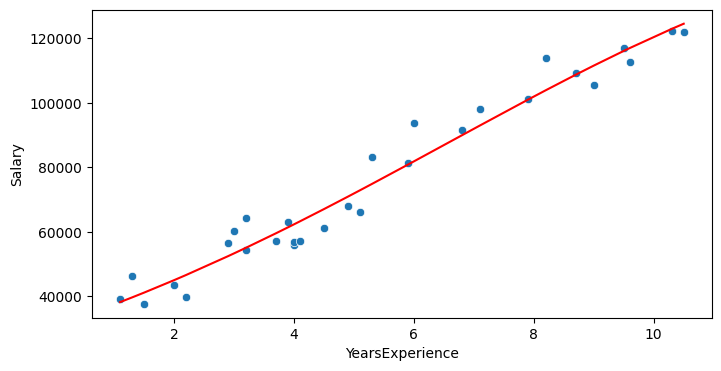

In [85]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=data['YearsExperience'], y=data['Salary'],data=data)
plt.plot(data['YearsExperience'],pred_s4,'red')
plt.show()

In [86]:
data = {"MODEL":pd.Series(["rmse_s_lin","rmse_slog","rmse_sexp","rmse_s_quad"]),
        "RMSE_Values":pd.Series([rmse_s_lin,rmse_slog,rmse_sexp,rmse_s_quad]),
        "Rsquare":pd.Series([model_s.rsquared,model_s2.rsquared,model_s3.rsquared,model_s4.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_s_lin,9.701277e-13,0.956957
1,rmse_slog,1.333926e-11,0.853889
2,rmse_sexp,1.103121e+02,0.931967
3,rmse_s_quad,1.103121e+02,0.948611
